In [1]:
import pandas as pd
df = pd.read_csv("./df_concat(최종388개).csv")
df = df.dropna()
df

,name,num,col,col1,col2,wish,day,price,day1,price1,...,category,high/low,W1M0,line,scrap,disrupt,X,event,prm,emb
0,(W) nike Dunk High Aluminum,DD1869-107,WHITE/ALUMINUM,white,blue,5072,2021-08-17,129000,2021-07-24,170000,...,dunk,high,w,nm,0,0,0,0,0,0
1,(W) nike Dunk High Black and White,DD1869-103,WHITE/BLACK-UNIVERSITY RED,white,black,10000,2021-05-01,129000,2021-05-01,299500,...,dunk,high,w,nm,0,0,0,0,0,0
2,(W) nike Dunk High Crimson Tint,DD1869-104,SAIL/CRIMSON TINT,white,pink,1381,2021-06-04,129000,2021-05-22,130000,...,dunk,high,w,nm,0,0,0,0,0,0
3,(W) nike Dunk High Dark Sulfur,DD1869-106,WHITE/DARK SULFUR-WHITE,white,yellow,2607,2021-04-16,129000,2021-04-16,207692,...,dunk,high,w,sp,0,0,0,0,0,0
4,(W) nike Dunk High Football Grey,DD1869-102,SAIL/FOOTBALL GREY-PALE IVORY,white,grey,5488,2021-01-07,129000,2021-01-06,166000,...,dunk,high,w,nm,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,Adidas Yeezy Boost 700 V2 Mauve,GZ0724,MAUVE/MAUVE/MAUVE,grey,grey,751,2021-09-25,309000,2021-09-25,344455,...,yeezy,low,m,nm,0,0,0,0,0,0
385,Adidas Yeezy Boost 700 Wash Orange,GW0296,WASH ORANGE/WASH ORANGE/WASH ORANGE,blue,orange,362,2021-10-15,309000,2021-10-16,324500,...,yeezy,low,m,nm,0,0,0,0,0,0
386,Adidas Yeezy QNTM Barium,H68771,BARIUM/BARIUM/BARIUM,beige,black,800,2020-06-25,329000,2020-06-25,542600,...,yeezy,low,m,nm,0,0,0,0,0,0
387,Adidas Yeezy QNTM Lifestyle,Q46473,QNTM,black,black,1294,2020-09-05,329000,2020-06-08,1250000,...,yeezy,low,m,nm,0,0,0,0,0,0


In [2]:
df = df.drop(["name", "num","day", "day1","col"], axis = 1)

In [3]:
growth = ((df['min']-df['price'])/df['price'] * 100)
growth.describe()

a = growth.describe().tolist()[4]
b = growth.describe().tolist()[6]

top = b + 1.5*(b-a)
bottom = a - 1.5*(b-a)

df = df[(growth <= top) & (growth >= bottom)]

df

,col1,col2,wish,price,price1,price2,price3,min,brand,category,high/low,W1M0,line,scrap,disrupt,X,event,prm,emb
0,white,blue,5072,129000,170000,150000,150750,132700,nike,dunk,high,w,nm,0,0,0,0,0,0
1,white,black,10000,129000,299500,315000,350000,214500,nike,dunk,high,w,nm,0,0,0,0,0,0
2,white,pink,1381,129000,130000,130000,132500,123000,nike,dunk,high,w,nm,0,0,0,0,0,0
3,white,yellow,2607,129000,207692,197200,193455,160000,nike,dunk,high,w,sp,0,0,0,0,0,0
4,white,grey,5488,129000,166000,248667,246250,166000,nike,dunk,high,w,nm,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,grey,grey,751,309000,344455,343667,329760,314000,adidas,yeezy,low,m,nm,0,0,0,0,0,0
385,blue,orange,362,309000,324500,319000,319000,245000,adidas,yeezy,low,m,nm,0,0,0,0,0,0
386,beige,black,800,329000,542600,485118,525455,426000,adidas,yeezy,low,m,nm,0,0,0,0,0,0
387,black,black,1294,329000,1250000,1250000,1250000,411000,adidas,yeezy,low,m,nm,0,0,0,0,0,0


In [4]:
# 색상값 1
df_col1 = pd.get_dummies(df['col1'], prefix = 'col1')
df_col2 = pd.get_dummies(df['col2'], prefix = 'col2')
df_co1_1 = pd.concat([df_col1 , df_col2], axis =1)

# 카테고리
df_category = pd.get_dummies(df['category'], prefix = 'category')

# 로우하이
df_high_low_mid = pd.get_dummies(df['high/low'], prefix = 'high/low/mid')

# 브랜드
df_brand = pd.get_dummies(df['brand'], prefix = 'brand')

# line
df_line = pd.get_dummies(df['line'], prefix = 'line')

# 성별
df_sex = pd.get_dummies(df['W1M0'], prefix = 'W1M0')

df_final_p = pd.concat([df_co1_1, df_category, df_high_low_mid, df_brand, df_line, df_sex], axis =1)

In [5]:
df_copy = df.copy().drop(["col1","col2","brand","category","high/low","W1M0","line"], axis = 1)

In [6]:
df = pd.concat([df_copy, df_final_p], axis = 1)

In [7]:
data = df.drop("min", axis = 1)

In [8]:
data.to_numpy()

array([[   5072,  129000,  170000, ...,       0,       0,       1],
       [  10000,  129000,  299500, ...,       0,       0,       1],
       [   1381,  129000,  130000, ...,       0,       0,       1],
       ...,
       [    800,  329000,  542600, ...,       0,       1,       0],
       [   1294,  329000, 1250000, ...,       0,       1,       0],
       [    425,  355100,  375000, ...,       0,       1,       0]])

In [9]:
df['min'].to_numpy()

array([132700, 214500, 123000, 160000, 166000, 127000, 160818, 112000,
       120000, 176143, 213571, 139333, 152667, 105000, 269000, 165167,
       158000, 186700, 176000, 200000, 185000, 126000, 214000, 117000,
       228615, 151727, 122000, 255000, 205000, 137000, 142500, 174000,
       450000, 563500, 226000, 356000, 226333, 185000, 300000, 340000,
       162000, 110000, 125000, 194600, 149000, 129000, 147600, 120000,
       139000, 142429, 183500, 181111, 172000, 132000, 166000, 152000,
       160000, 170000, 536667, 535415, 251267, 268667, 118500, 147500,
       168129, 133000, 143500, 145000, 141500, 138000, 122167, 135000,
       130000, 151750, 126000, 143571, 326000, 136800, 120000, 135000,
        82000, 130800, 120000,  99000, 230000, 290000, 259000, 295000,
       289000, 229000, 216000, 305000, 429167, 140000, 181000, 131000,
       190000, 108667, 109000, 119000, 119086, 230000, 320000, 311000,
       636625, 522000, 390000, 254250, 312500, 300000, 389000, 544750,
      

## 랜덤포레스트

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns

In [11]:
X = data.to_numpy()
y = df['min'].to_numpy()

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# 70프로를 트레이닝 셋, 30프로를 테스트 셋
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123) # 70% training and 30% test

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
# estimators  : 랜덤 포레스트 안에 만들어지는 의사결정 나무의 갯수
clf = RandomForestClassifier(n_estimators=100)

In [16]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [17]:
y_pred = clf.predict(X_test)

In [18]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.03636363636363636


In [19]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

RMSE: 57537.082889


In [20]:
data_a = data.columns.tolist()

In [21]:
# 영향
feature_imp = pd.Series(clf.feature_importances_, index=data_a).sort_values(ascending=False)
feature_imp

price3               0.095206
wish                 0.093320
price2               0.091460
price1               0.090291
price                0.065075
                       ...   
category_jordan 6    0.001042
category_converse    0.000929
brand_converse       0.000832
category_jordan 5    0.000000
col1_burgundy        0.000000
Length: 79, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


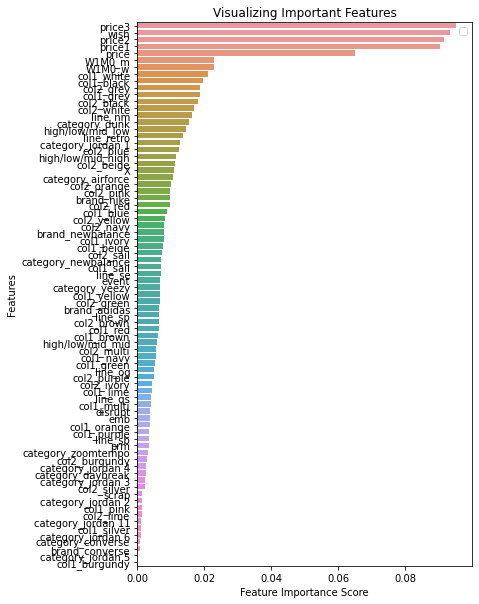

In [22]:
# Commented out IPython magic to ensure Python compatibility.
import matplotlib.pyplot as plt
# %matplotlib inline
plt.figure(figsize=(6,10))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

pca

## 다중회귀

In [23]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train, y_train) 

LinearRegression()

In [24]:
y_predict = mlr.predict(X_test)

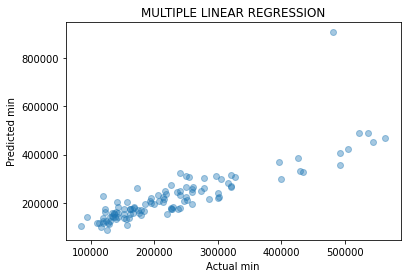

In [25]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual min")
plt.ylabel("Predicted min")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

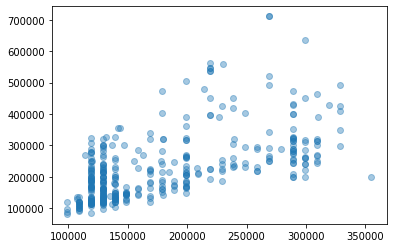

In [26]:
plt.scatter(df[['price']], df[['min']], alpha=0.4)
plt.show()

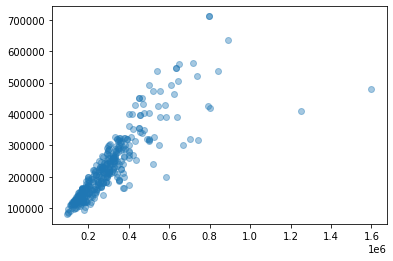

In [27]:
plt.scatter(df[['price1']], df[['min']], alpha=0.4)
plt.show()

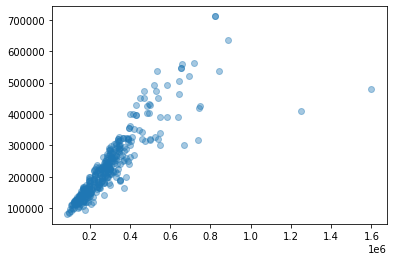

In [28]:
plt.scatter(df[['price2']], df[['min']], alpha=0.4)
plt.show()

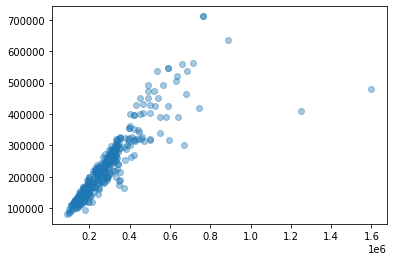

In [29]:
plt.scatter(df[['price3']], df[['min']], alpha=0.4)
plt.show()

In [30]:
print(mlr.coef_)

[-4.80935891e-02  3.35976106e-01 -1.62878439e-02  7.00193131e-02
  4.11440240e-01  2.17691483e+03 -1.85784632e+04  5.89889355e+04
 -4.95125432e+03 -6.28168771e+03 -3.58177166e+04  1.26167257e+04
 -5.67097041e+03 -6.51481216e+03 -4.64405039e+03 -5.31144906e-10
 -1.30540069e+04  1.80925966e+04  8.22744499e+03 -5.96115052e+04
  7.06072535e+03  1.57556573e+04 -9.49402623e+03  1.19766381e+04
  2.10815085e+04 -3.35542121e+04 -1.46267875e+04  7.98937525e+04
  1.10095077e+04 -3.85441859e+04  5.62523109e+02 -2.45379734e+03
 -2.28378372e+04 -1.28666334e+02  2.68275431e+04 -2.86822253e+04
  8.79146715e+03 -5.57649456e+03  2.36528278e+04  1.54433232e+04
  8.23939620e+03 -8.12750256e+03  3.19088676e+03 -1.23583168e+04
 -8.44608039e+03 -1.79786145e+04  2.73525757e+04 -2.02473016e+03
 -5.44627790e+03  7.59087708e+02 -1.23713007e+04  3.72200591e+03
  9.57742813e+03  2.41524744e+04 -1.21662107e+04 -1.12590012e+04
 -6.43917525e+04  1.17954183e+05 -7.27595761e-12  1.73721597e+04
 -4.21365754e+03  3.73538

In [31]:
print(mlr.score(X_train, y_train))

0.8751378895634457


In [32]:
rmse = np.sqrt(mean_squared_error(y_test, y_predict))
print("RMSE: %f" % (rmse))

RMSE: 59774.035311


## XGBoost

In [33]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [34]:
# xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
#                 max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg = xgb.XGBRegressor(objective ='reg:linear',n_estimators = 100)

In [35]:
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

[22:02:11] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [36]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 36915.956295
